### READ ME

Use the code blocks below to answer each question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

## **Data Import**

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
print('Packages Imported')


df = pd.read_csv('/Users/liber/OneDrive/Documents/Junior Year/IS Junior Core/IS 455 Python Machine Learning/Classification/student_enrollment_sample.csv')

df[0:6]



Packages Imported


EXPECTED_START_DATE GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
0                 NaN             NaN           1.0             0.0   
1                 NaN        2/8/2016           1.0             0.0   
2                 NaN             NaN           1.0             0.0   
3                 NaN             NaN           1.0             0.0   
4                 NaN             NaN           1.0             0.0   
5                 NaN             NaN           1.0             0.0   

   MINUTES_ATTENDED  HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  \
0               NaN              0.0           0.0                0.0   
1               NaN              0.0           0.0                0.0   
2               NaN              0.0           0.0                0.0   
3               NaN              0.0           0.0                0.0   
4               NaN              0.0           0.0                0.0   
5               NaN              0.0           0.0                0.0   

   MINUTES_ABSENT  DAYS_ABSENT  ...  CREDITS_LEFT  ENROLLMENT_COUNT  \
0             NaN          0.0  ...           NaN               NaN   
1             NaN          0.0  ...           NaN               NaN   
2             NaN          0.0  ...         180.0               2.0   
3             NaN          0.0  ...          60.0               3.0   
4             NaN          0.0  ...           NaN               NaN   
5             NaN          0.0  ...         182.0               2.0   

  MODS_ATTENDED_COUNT HS_GRADUATED_FLAG DISABLED_FLAG  HISPANIC_FLAG  \
0                 NaN               NaN           NaN            NaN   
1                 NaN               NaN           NaN            NaN   
2                 0.0               0.0           0.0            0.0   
3                 0.0               0.0           0.0            1.0   
4                 NaN               NaN           NaN            NaN   
5                 1.0               0.0           0.0            0.0   

   VETERAN_FLAG               STATUS_DESCRIPTION  IN_SCHOOL_FLAG  \
0           NaN            Application Cancelled             0.0   
1           NaN                        Applicant             0.0   
2           0.0  Pending Applicant - Portal Only             0.0   
3           0.0                        Applicant             0.0   
4           NaN  Pending Applicant - Portal Only             0.0   
5           0.0                        Applicant             0.0   

   SIMPLE_STATUS_DESCRIPTION  
0                      Other  
1                      Other  
2                      Other  
3                      Other  
4                      Other  
5                      Other  

[6 rows x 35 columns]

# **Two-Class Modeling**

## **Data Cleaning**

### Missing Values

In [3]:
# Question 2: Print out a list of missing values for each column in the 
# dataset. HINT: search for 'pandas .isna() example'
df2 = df.isna()

print(df2)

def missing_zero_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
        #     "There are " + str(mz_table.shape[0]) +
        #       " columns that have missing values.")
        return mz_table


    



       EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
0                     True             True         False           False   
1                     True            False         False           False   
2                     True             True         False           False   
3                     True             True         False           False   
4                     True             True         False           False   
...                    ...              ...           ...             ...   
49996                False            False         False           False   
49997                False            False         False           False   
49998                False            False         False           False   
49999                False            False         False           False   
50000                 True             True          True            True   

       MINUTES_ATTENDED  HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  

In [4]:
# Question 3: Make a copy of the original DataFrame to work with
# (in case we want to use the original again later). Iterate through
# the new DataFrame and remove any column that has more than 30% of
# the records/cases missing. Print out a summary of missing value
# percentages for each remaining column.

dfcopy = df

for i in dfcopy:
    if (100 * dfcopy[i].isnull().sum() / len(df)) > 30:
        # print(i)
        dfcopy = dfcopy.drop(i, axis=1)

missing_zero_values_table(dfcopy)



Missing Values  % of Total Values Data Type
LAST_ACTIVITY_DATE                   4388                8.8    object
EXPECTED_START_DATE                  1871                3.7    object
GRADUATION_DATE                      1598                3.2    object
COHORT_YEAR                          1375                2.7   float64
BIRTH_DATE                           1361                2.7    object
CREDITS_LEFT                         1336                2.7   float64
CREDITS_REQUIRED                     1336                2.7   float64
MOD_NUMBER                           1324                2.6   float64
CREDITS_ATTEMPTED                    1323                2.6   float64
VETERAN_FLAG                         1323                2.6   float64
HISPANIC_FLAG                        1323                2.6   float64
DISABLED_FLAG                        1323                2.6   float64
HS_GRADUATED_FLAG                    1323                2.6   float64
MODS_ATTENDED_COUNT                  1323                2.6   float64
ENROLLMENT_COUNT                     1323                2.6   float64
CREDITS_EARNED                       1323                2.6   float64
AR_BALANCE                           1323                2.6   float64
ENROLLMENT_GPA                       1322                2.6   float64
PROGRAM_GROUP                          14                0.0    object
REENTRY_NUMBER                          1                0.0   float64
DAYS_ABSENT                             1                0.0   float64
AR_BALANCE_AMOUNT                       1                0.0   float64
HOURS_EARNED                            1                0.0   float64
HOURS_ATTEMPTED                         1                0.0   float64
NUMBER_AVERAGE                          1                0.0   float64
ENROLL_COUNT                            1                0.0   float64
STATUS_DESCRIPTION                      1                0.0    object
IN_SCHOOL_FLAG                          1                0.0   float64
SIMPLE_STATUS_DESCRIPTION               1                0.0    object

In [5]:
# Question 4: Drop all remaining rows that contain any missing data.
# Print out the numer of rows and columns in the remaining dataset.

dfcopy = dfcopy.dropna()

print("Number of columns: " + str(len(dfcopy.columns)))
print("Number of rows: " + str(len(dfcopy)))


Number of columns: 29
Number of rows: 44965


### Handle Dates

In [6]:
# Question 5: Now it's time to handle the date values. LAST_ACTIVITY_DATE,
# EXPECTED_START_DATE, BIRTH_DATE, and GRADUATION_DATE may all be useful. 
# For LAST_ACTIVITY_DATE, EXPECTED_START_DATE, and BIRTH_DATE, replace the 
# date value with the number of days between that date and 2022-1-1. In other
# words: 2022-1-1 minus the date value in the field. For GRADUATION_DATE, 
# replace the date value with the number of days until graduation assuming
# that today's date is 2020-1-1. In other words, calculate: GRADUATION_DATE 
# minus 2020-1-1. Print out the first five rows to examine the results.

from datetime import datetime
from dateutil import parser

dLAST_ACTIVITY_DATE = []
dEXPECTED_START_DATE = []
dBIRTH_DATE = []
dGRADUATION_DATE = []

for i in dfcopy['LAST_ACTIVITY_DATE']:
    LAST_ACTIVITY_DATE = parser.parse(i).date()
    f_date = datetime.strptime('1-1-2022', '%d-%m-%Y').date()
    delta = f_date - LAST_ACTIVITY_DATE
    dLAST_ACTIVITY_DATE.append(delta.days)

dLAST_ACTIVITY_DATE

for i in dfcopy['EXPECTED_START_DATE']:
    EXPECTED_START_DATE = parser.parse(i).date()
    f_date = datetime.strptime('1-1-2022', '%d-%m-%Y').date()
    delta = f_date - EXPECTED_START_DATE
    dEXPECTED_START_DATE.append(delta.days)

dEXPECTED_START_DATE

for i in dfcopy['BIRTH_DATE']:
    BIRTH_DATE = parser.parse(i).date()
    f_date = datetime.strptime('1-1-2022', '%d-%m-%Y').date()
    delta = f_date - BIRTH_DATE
    dBIRTH_DATE.append(delta.days)

dBIRTH_DATE

for i in dfcopy['GRADUATION_DATE']:
    GRADUATION_DATE = parser.parse(i).date()
    g_date = datetime.strptime('1-1-2020', '%d-%m-%Y').date()
    delta = GRADUATION_DATE - g_date
    dGRADUATION_DATE.append(delta.days)

dGRADUATION_DATE

dfcopy['LAST_ACTIVITY_DATE'] = dLAST_ACTIVITY_DATE
dfcopy['EXPECTED_START_DATE'] = dEXPECTED_START_DATE
dfcopy['BIRTH_DATE'] = dBIRTH_DATE
dfcopy['GRADUATION_DATE'] = dGRADUATION_DATE

dfcopy.head(5)



EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
1873                  236             1572           1.0             0.0   
1874                  236             1544           1.0             0.0   
1875                  236             1544           1.0             0.0   
1876                  236             1040           1.0             0.0   
1878                  236             1040           1.0             0.0   

      HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
1873              0.0           0.0                0.0          0.0   
1874              0.0           0.0                0.0          0.0   
1875              0.0           0.0                0.0          0.0   
1876              0.0           0.0                0.0          0.0   
1878              0.0           0.0                0.0          0.0   

      REENTRY_NUMBER PROGRAM_GROUP  ...  CREDITS_LEFT  ENROLLMENT_COUNT  \
1873             0.0         GAGAB  ...         183.0               2.0   
1874             0.0         BUBAB  ...         180.0               1.0   
1875             0.0         BUBAB  ...         180.0               1.0   
1876             0.0         MSMAA  ...          95.0               1.0   
1878             0.0         MSMAA  ...          95.0               1.0   

      MODS_ATTENDED_COUNT  HS_GRADUATED_FLAG  DISABLED_FLAG  HISPANIC_FLAG  \
1873                  1.0                0.0            0.0            0.0   
1874                  0.0                0.0            0.0            0.0   
1875                  0.0                0.0            0.0            0.0   
1876                  1.0                0.0            0.0            0.0   
1878                  0.0                0.0            0.0            0.0   

      VETERAN_FLAG  STATUS_DESCRIPTION  IN_SCHOOL_FLAG  \
1873           0.0        Future Start             0.0   
1874           0.0           Applicant             0.0   
1875           0.0           Applicant             0.0   
1876           0.0        Future Start             0.0   
1878           0.0           Applicant             0.0   

      SIMPLE_STATUS_DESCRIPTION  
1873                      Other  
1874                      Other  
1875                      Other  
1876                      Other  
1878                      Other  

[5 rows x 29 columns]

### Bin Categorical Values

In [7]:
# Question 6: The PROGRAM_GROUP feature indicates which academic program
# the student is working on. Some of them are very small programs and 
# represent less than five percent of the data. We need to bin those programs
# into a new value called "Other". Start by printing a list of PROGRAM_GROUP
# values divided by the total number of records in order to see what percent
# of the cases they represent. Then, iterate through the rows and change every 
# program value to "Other" if it does not belong to a PROGRAM_GROUP that 
# represents at least five percent of the cases. Finally, print out the new 
# listof PROGRAM_GROUP values (including the new 'Other') to make sure your
# routine worked correctly. You do not need to print the values in 'percent'
# format. The original decimal values are fine.


program_names = {}

for program_name in dfcopy['PROGRAM_GROUP']:
        if program_name in program_names.keys():
            program_names[program_name] = program_names[program_name] + 1
        else:
            temp_dict = {program_name:1}
            program_names.update(temp_dict)
# print(program_names)

totalvalues = len(dfcopy)
others_dict = []

for pair in program_names:
    program_names[pair] = round(program_names[pair]/totalvalues,4)

    if program_names[pair] < .05:
        others_dict.append(pair)


# print(others_dict)
dfcopy["PROGRAM_GROUP"] = dfcopy["PROGRAM_GROUP"].replace(others_dict, "Other")

print(dfcopy.PROGRAM_GROUP.unique())

# calc = dfcopy.groupby(["PROGRAM_GROUP"]).size() /len(dfcopy)
# calc


['GAGAB' 'BUBAB' 'MSMAA' 'CSCNB' 'CSSMB' 'HSHMB' 'Other']


### Relabel Label

In [8]:
# Question 7: Print the first five records of a filtered version of 
# the DataFrame including only the 'IN_SCHOOL_FLAG' and 'STATUS_DESCRIPTION' 
# features. Notice that all those who have graduated have an 'IN_SCHOOL_FLAG'
# of zero which makes them the same as students who have dropped out or
# have been terminated. Because we want students to graduate, we need to 
# treat them the same as those who are active. Therefore, convert the 
# 'IN_SCHOOL_FLAG' value for all graduates to 1 (or 1.0). In addition, convert
# their 'SIMPLE_STATUS_DESCRIPTION' to 'Active'.
print(dfcopy[['IN_SCHOOL_FLAG', 'STATUS_DESCRIPTION']].head(5))


dfcopy['IN_SCHOOL_FLAG'] = np.where((dfcopy['STATUS_DESCRIPTION'] == 'Graduate'), 1.0, dfcopy['IN_SCHOOL_FLAG'])
dfcopy['SIMPLE_STATUS_DESCRIPTION'] = np.where((dfcopy['STATUS_DESCRIPTION'] == 'Graduate'), 'Active', dfcopy['SIMPLE_STATUS_DESCRIPTION'])


# rslt_df = dfcopy[(dfcopy['STATUS_DESCRIPTION'] == 'Graduate')]


      IN_SCHOOL_FLAG STATUS_DESCRIPTION
1873             0.0       Future Start
1874             0.0          Applicant
1875             0.0          Applicant
1876             0.0       Future Start
1878             0.0          Applicant


## **Classification Modeling**

### Dummy Coding

In [9]:
# Question 8: Import the packages necessary for a DecisionTreeClassifier and 
# a train_test_split. We will use these later. For now, create another copy of the 
# latest DataFrame to work from. Using the new copy, convert MOD_NUMBER and 
# COHORT_YEAR to 'object' data types. That is because those values are numbers
# but, theoretically, they represent categorical values. Drop STATUS_DESCRIPTION
# and SIMPLE_STATUS_DESCRIPTION from the new DataFrame since those are alternative
# labels and we are going to use IN_SCHOOL_FLAG as the two-class label for our first
# model. Create dummy codes for all remaining features in the new DataFrame. Print
# out the first five records of the new DataFrame. There should be no remaining 
# categorical values and many new dummy code features.

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

dfcopy2 = dfcopy
dfcopy2['MOD_NUMBER'] = dfcopy2['MOD_NUMBER'].astype(object)
dfcopy2['COHORT_YEAR'] = dfcopy2['COHORT_YEAR'].astype(object)
dfcopy2 = dfcopy2.drop(columns=['STATUS_DESCRIPTION','SIMPLE_STATUS_DESCRIPTION'], axis=1)

dfcopy2 = pd.get_dummies(dfcopy2, prefix=None, drop_first=True)

dfcopy2[0:5]


c:\Users\liber\Documents\byu-venv\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
1873                  236             1572           1.0             0.0   
1874                  236             1544           1.0             0.0   
1875                  236             1544           1.0             0.0   
1876                  236             1040           1.0             0.0   
1878                  236             1040           1.0             0.0   

      HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
1873              0.0           0.0                0.0          0.0   
1874              0.0           0.0                0.0          0.0   
1875              0.0           0.0                0.0          0.0   
1876              0.0           0.0                0.0          0.0   
1878              0.0           0.0                0.0          0.0   

      REENTRY_NUMBER  BIRTH_DATE  ...  MOD_NUMBER_8.0  MOD_NUMBER_9.0  \
1873             0.0       12991  ...               0               0   
1874             0.0         236  ...               0               0   
1875             0.0       15512  ...               0               0   
1876             0.0        7221  ...               0               0   
1878             0.0        7298  ...               0               0   

      MOD_NUMBER_10.0  MOD_NUMBER_11.0  MOD_NUMBER_12.0  MOD_NUMBER_13.0  \
1873                0                0                0                0   
1874                0                0                0                0   
1875                0                0                0                0   
1876                0                0                0                0   
1878                0                0                0                0   

      COHORT_YEAR_2023.0  COHORT_YEAR_2024.0  COHORT_YEAR_2025.0  \
1873                   0                   0                   0   
1874                   0                   0                   0   
1875                   0                   0                   0   
1876                   0                   1                   0   
1878                   0                   1                   0   

      COHORT_YEAR_2026.0  
1873                   1  
1874                   1  
1875                   1  
1876                   0  
1878                   0  

[5 rows x 45 columns]

### Select Label and Features

In [10]:
# Question 9: Set the y and X variables to represent the label
# and feature set. Print out the first five records of the feature
# list to verify it looks correct.

y = dfcopy2["IN_SCHOOL_FLAG"]
dfcopy2 = dfcopy2.drop(columns=['IN_SCHOOL_FLAG'], axis=1)

x= dfcopy2

x[0:5]



EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
1873                  236             1572           1.0             0.0   
1874                  236             1544           1.0             0.0   
1875                  236             1544           1.0             0.0   
1876                  236             1040           1.0             0.0   
1878                  236             1040           1.0             0.0   

      HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
1873              0.0           0.0                0.0          0.0   
1874              0.0           0.0                0.0          0.0   
1875              0.0           0.0                0.0          0.0   
1876              0.0           0.0                0.0          0.0   
1878              0.0           0.0                0.0          0.0   

      REENTRY_NUMBER  BIRTH_DATE  ...  MOD_NUMBER_8.0  MOD_NUMBER_9.0  \
1873             0.0       12991  ...               0               0   
1874             0.0         236  ...               0               0   
1875             0.0       15512  ...               0               0   
1876             0.0        7221  ...               0               0   
1878             0.0        7298  ...               0               0   

      MOD_NUMBER_10.0  MOD_NUMBER_11.0  MOD_NUMBER_12.0  MOD_NUMBER_13.0  \
1873                0                0                0                0   
1874                0                0                0                0   
1875                0                0                0                0   
1876                0                0                0                0   
1878                0                0                0                0   

      COHORT_YEAR_2023.0  COHORT_YEAR_2024.0  COHORT_YEAR_2025.0  \
1873                   0                   0                   0   
1874                   0                   0                   0   
1875                   0                   0                   0   
1876                   0                   1                   0   
1878                   0                   1                   0   

      COHORT_YEAR_2026.0  
1873                   1  
1874                   1  
1875                   1  
1876                   0  
1878                   0  

[5 rows x 44 columns]

### Split Data

In [11]:
# Question 10: Split the y and X sets into training and testing sets. Do 
# a 70/30 split meaning 70% training data. Use a random seed of 12345.
# Print out the first five records of the X_test dataset.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=12345)

x_test.head(5)

EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
2148                   236             1544           1.0        0.000000   
22511                  390             1390           1.0        0.000000   
45412                  530             1250           1.0        0.000000   
16742                  348              606           1.0       99.468553   
7689                   292              984           1.0        0.000000   

       HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
2148               0.0           0.0                0.0          0.0   
22511              0.0           0.0                0.0          0.0   
45412              0.0           0.0                0.0          0.0   
16742           1790.0        1790.0              -75.0          0.0   
7689               0.0           0.0                0.0          0.0   

       REENTRY_NUMBER  BIRTH_DATE  ...  MOD_NUMBER_8.0  MOD_NUMBER_9.0  \
2148              0.0        7079  ...               0               0   
22511             0.0        9812  ...               0               0   
45412             0.0       12352  ...               1               0   
16742             0.0        9701  ...               0               0   
7689              0.0       13273  ...               0               0   

       MOD_NUMBER_10.0  MOD_NUMBER_11.0  MOD_NUMBER_12.0  MOD_NUMBER_13.0  \
2148                 0                0                0                0   
22511                0                0                0                1   
45412                0                0                0                0   
16742                0                0                0                0   
7689                 0                0                0                0   

       COHORT_YEAR_2023.0  COHORT_YEAR_2024.0  COHORT_YEAR_2025.0  \
2148                    0                   0                   0   
22511                   0                   0                   0   
45412                   0                   0                   1   
16742                   0                   0                   0   
7689                    0                   1                   0   

       COHORT_YEAR_2026.0  
2148                    1  
22511                   1  
45412                   0  
16742                   1  
7689                    0  

[5 rows x 44 columns]

### Create Classifier and Fit Model

In [12]:
# Question 11: Create and fit a DecisionTreeClassifier() model using the 
# training datasets.
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

In [13]:
# Question 12: Generate predictions for the testing dataset. Add the 
# predicted values to a new DataFrame along with the actual values and
# print out the first 10 records. How many of the records are inaccurate?

y_pred = clf.predict(x_test)

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
output_df.head(10)

Actual  Predicted
2148      0.0        0.0
22511     0.0        0.0
45412     0.0        0.0
16742     1.0        1.0
7689      0.0        0.0
22725     0.0        0.0
26189     0.0        0.0
39307     0.0        0.0
48033     0.0        0.0
23015     0.0        0.0

### Assess Model Fit/Quality/Accuracy

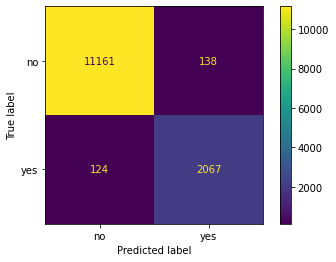

In [14]:
# Question 13: Generate a confusion matrix for the results. How many 
# students are active, but predicted to quit?

from sklearn import metrics 
from matplotlib import pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['no', 'yes'])
cm_display.plot(values_format='d')
plt.show()

In [15]:
# Question 14: Generate the accuracy, precision, recall, and f1 scores for 
# the predictions of active students. What is the accuracy score?
 
# Accuracy  = (true positives + true negatives) / (total cases); ranges from 0 (worst) to 1 (best)
print(f"Accuracy:\t{metrics.accuracy_score(y_test, y_pred)}")
    
# Precision = (true positives / (true positives + false positives))
print(f"Precision:\t{metrics.precision_score(y_test, y_pred, labels=['no', 'yes'])}")
    
# Recall    = (true positives / (true positives + false negatives)) 
print(f"Recall:\t\t{metrics.recall_score(y_test, y_pred, labels=['no', 'yes'])}")
    
# F1        = (2 * (precision * recall) / (precision + recall))
print(f"F1:\t\t{metrics.f1_score(y_test, y_pred, labels=['no', 'yes'])}")

Accuracy:	0.9805782060785767
Precision:	0.9374149659863945
Recall:		0.943404837973528
F1:		0.940400363967243


### Visualize Classification Model

In [16]:
# Question 15: Generate a tree visualization using export_graphviz. 
# What feature is used in the most important feature?

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = x.columns,class_names=['no', 'yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dropouts.png')
Image(graph.create_png())

# **Multi-Class Modeling**

## **Data Cleaning**

### Combine or Eliminate Low Frequency Values

In [17]:
# Question 16: The label 'IN_SCHOOL_FLAG' was ideal for a two-class classification
# model. However, most students are put on probation before they are terminated. 
# Therefore, it could be useful to predict three distinct categories: Active, 
# Probation, and Terminated. First, let's identify what all possible label combinations
# exist across all three labels. Print a list of all value combinations of 
# 'STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', and 'SIMPLE_STATUS_DESCRIPTION' along 
# with a count of how often each occurs. 

# HINT: consider using the .groupby() method of Pandas to perform this in a single
# line of code. See the image below for an example of what this may look like.
# The purpose behind this task is to explore our options for potential labels in
# this dataset. Each of those features represent current states for each student.

dfcopy3 = dfcopy
# df_copy3[['STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', 'SIMPLE_STATUS_DESCRIPTION']]
dfcopy3.groupby(['STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', 'SIMPLE_STATUS_DESCRIPTION'])['ENROLL_COUNT'].count()


STATUS_DESCRIPTION           IN_SCHOOL_FLAG  SIMPLE_STATUS_DESCRIPTION
Active                       1.0             Active                        6585
Active-Pre Grad              1.0             Active                         287
Applicant                    0.0             Other                         1484
Application Cancelled        0.0             Other                         9883
Cancel                       0.0             Terminated                    1633
Dismissed                    0.0             Terminated                     203
Drop                         0.0             Terminated                    1562
False Re-Enter               0.0             Terminated                     460
False Start                  0.0             Terminated                    4074
Future Start                 0.0             Other                          876
Graduate                     1.0             Active                         317
NDS-Complete                 0.0             Othe

In [18]:
# Question 17: To simplify our eventual model, eliminate all records for students
# whose 'SIMPLE_STATUS_DESCRIPTION' = 'Other'. Then, reprint the table above to 
# ensure it worked properly.

dfcopy3 = dfcopy3[dfcopy3.SIMPLE_STATUS_DESCRIPTION != 'Other']
dfcopy3.groupby(['STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', 'SIMPLE_STATUS_DESCRIPTION'])['ENROLL_COUNT'].count()
    

STATUS_DESCRIPTION         IN_SCHOOL_FLAG  SIMPLE_STATUS_DESCRIPTION
Active                     1.0             Active                        6585
Active-Pre Grad            1.0             Active                         287
Cancel                     0.0             Terminated                    1633
Dismissed                  0.0             Terminated                     203
Drop                       0.0             Terminated                    1562
False Re-Enter             0.0             Terminated                     460
False Start                0.0             Terminated                    4074
Graduate                   1.0             Active                         317
No Show                    0.0             Terminated                   17229
Probation                  1.0             Active                         224
Transfer To Other Program  0.0             Terminated                      53
Name: ENROLL_COUNT, dtype: int64

In [19]:
# Question 18: Next, eliminate anyone whose 'SIMPLE_STATUS_DESCRIPTION' = 
# 'Transfer To Other Program', 'No Show', or 'False Start' since those outcomes
# are not relevant to students who were once active. Re-print the same summary
# table afterward.

dfcopy3 = dfcopy3[dfcopy3.STATUS_DESCRIPTION != 'Transfer To Other Program']
dfcopy3 = dfcopy3[dfcopy3.STATUS_DESCRIPTION != 'No Show']
dfcopy3 = dfcopy3[dfcopy3.STATUS_DESCRIPTION != 'False Start']
dfcopy3.groupby(['STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', 'SIMPLE_STATUS_DESCRIPTION'])['ENROLL_COUNT'].count()

STATUS_DESCRIPTION  IN_SCHOOL_FLAG  SIMPLE_STATUS_DESCRIPTION
Active              1.0             Active                       6585
Active-Pre Grad     1.0             Active                        287
Cancel              0.0             Terminated                   1633
Dismissed           0.0             Terminated                    203
Drop                0.0             Terminated                   1562
False Re-Enter      0.0             Terminated                    460
Graduate            1.0             Active                        317
Probation           1.0             Active                        224
Name: ENROLL_COUNT, dtype: int64

In [20]:
# Question 19: Finally, relabel the 'SIMPLE_STATUS_DESCRIPTION' of those whose
# 'STATUS_DESCRIPTION' = 'Probation' to 'Probation'. Re-print the table.

dfcopy3['SIMPLE_STATUS_DESCRIPTION'] = np.where((dfcopy3['STATUS_DESCRIPTION'] == 'Probation'), 'Probation', dfcopy3['SIMPLE_STATUS_DESCRIPTION'])
dfcopy3.groupby(['STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', 'SIMPLE_STATUS_DESCRIPTION'])['ENROLL_COUNT'].count()



STATUS_DESCRIPTION  IN_SCHOOL_FLAG  SIMPLE_STATUS_DESCRIPTION
Active              1.0             Active                       6585
Active-Pre Grad     1.0             Active                        287
Cancel              0.0             Terminated                   1633
Dismissed           0.0             Terminated                    203
Drop                0.0             Terminated                   1562
False Re-Enter      0.0             Terminated                    460
Graduate            1.0             Active                        317
Probation           1.0             Probation                     224
Name: ENROLL_COUNT, dtype: int64

## **Classification Modeling**

### Dummy Codes

In [21]:
# Question 20: Create a new copy of the DataFrame to work from. The features
# 'MOD_NUMBER' and 'COHORT_YEAR' represent categorical values that do not have an 
# order. Therefore, they should be treated as categories and cast to objects. Once
# you have done so, drop the alternative labels 'STATUS_DESCRIPTION' and 
# 'IN_SCHOOL_FLAG' from the dataset because we will be predicting 
# 'SIMPLE_STATUS_DESCRIPTION'. Then, generate dummy codes for the remaining features.
# Print out the first five records to verify everything worked correctly.

dfcopy4 = dfcopy3

dfcopy4['MOD_NUMBER'] = dfcopy4['MOD_NUMBER'].astype(object)
dfcopy4['COHORT_YEAR'] = dfcopy4['COHORT_YEAR'].astype(object)
dfcopy4 = dfcopy4.drop(columns=['STATUS_DESCRIPTION','IN_SCHOOL_FLAG'], axis=1)

y = dfcopy4["SIMPLE_STATUS_DESCRIPTION"]
dfcopy4 = dfcopy4.drop(columns=['SIMPLE_STATUS_DESCRIPTION'], axis=1)

dfcopy4 = pd.get_dummies(dfcopy4, prefix=None, drop_first=True)


dfcopy4[0:5]


c:\Users\liber\Documents\byu-venv\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
3274                  264             1012           1.0        0.000000   
3275                  264             1544           1.0        0.000000   
3280                  264              956           1.0       85.130435   
3282                  264             1012           1.0        0.000000   
3293                  264             1544           1.0        0.000000   

      HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
3274              0.0           0.0             9040.0          0.0   
3275              0.0           0.0             8160.0          0.0   
3280            120.0         120.0             9040.0          0.0   
3282              0.0           0.0             9040.0          0.0   
3293              0.0           0.0             8160.0          0.0   

      REENTRY_NUMBER  BIRTH_DATE  ...  MOD_NUMBER_8.0  MOD_NUMBER_9.0  \
3274             0.0       10429  ...               0               0   
3275             0.0       10920  ...               0               0   
3280             0.0        7914  ...               0               0   
3282             0.0        7604  ...               0               0   
3293             0.0       13462  ...               0               0   

      MOD_NUMBER_10.0  MOD_NUMBER_11.0  MOD_NUMBER_12.0  MOD_NUMBER_13.0  \
3274                0                0                0                0   
3275                0                0                0                0   
3280                0                0                0                0   
3282                0                0                0                0   
3293                0                0                0                0   

      COHORT_YEAR_2023.0  COHORT_YEAR_2024.0  COHORT_YEAR_2025.0  \
3274                   0                   1                   0   
3275                   0                   0                   0   
3280                   0                   1                   0   
3282                   0                   1                   0   
3293                   0                   0                   0   

      COHORT_YEAR_2026.0  
3274                   0  
3275                   1  
3280                   0  
3282                   0  
3293                   1  

[5 rows x 44 columns]

### Select Label and Features

In [22]:
# Question 21: Create the y and X variables to store the label and features
# using 'SIMPLE_STATUS_DESCRIPTION' as the label. Print out the first five 
# records of X to make sure everything looks correct.


x= dfcopy4

x[0:5]


EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
3274                  264             1012           1.0        0.000000   
3275                  264             1544           1.0        0.000000   
3280                  264              956           1.0       85.130435   
3282                  264             1012           1.0        0.000000   
3293                  264             1544           1.0        0.000000   

      HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
3274              0.0           0.0             9040.0          0.0   
3275              0.0           0.0             8160.0          0.0   
3280            120.0         120.0             9040.0          0.0   
3282              0.0           0.0             9040.0          0.0   
3293              0.0           0.0             8160.0          0.0   

      REENTRY_NUMBER  BIRTH_DATE  ...  MOD_NUMBER_8.0  MOD_NUMBER_9.0  \
3274             0.0       10429  ...               0               0   
3275             0.0       10920  ...               0               0   
3280             0.0        7914  ...               0               0   
3282             0.0        7604  ...               0               0   
3293             0.0       13462  ...               0               0   

      MOD_NUMBER_10.0  MOD_NUMBER_11.0  MOD_NUMBER_12.0  MOD_NUMBER_13.0  \
3274                0                0                0                0   
3275                0                0                0                0   
3280                0                0                0                0   
3282                0                0                0                0   
3293                0                0                0                0   

      COHORT_YEAR_2023.0  COHORT_YEAR_2024.0  COHORT_YEAR_2025.0  \
3274                   0                   1                   0   
3275                   0                   0                   0   
3280                   0                   1                   0   
3282                   0                   1                   0   
3293                   0                   0                   0   

      COHORT_YEAR_2026.0  
3274                   0  
3275                   1  
3280                   0  
3282                   0  
3293                   1  

[5 rows x 44 columns]

### Split Data

In [23]:
# Question 22: Split the data using 70/30 split and 12345 as the random seed

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=12345)

x_test.head(5)

EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
17237                  348             1488           1.0       92.333333   
15035                  320              732           1.0       96.083333   
18248                  348              385           1.0        0.000000   
9492                   292             1516           1.0       90.000000   
46266                  530              522           1.0       73.894737   

       HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
17237            150.0         150.0             306.00          0.0   
15035           1279.0        1279.0               0.00          0.0   
18248              0.0           0.0               0.00          0.0   
9492              50.0          50.0            8135.00          0.0   
46266           1300.0         950.0            6435.67          0.0   

       REENTRY_NUMBER  BIRTH_DATE  ...  MOD_NUMBER_8.0  MOD_NUMBER_9.0  \
17237             0.0       15621  ...               0               0   
15035             0.0       10255  ...               0               0   
18248             0.0       11789  ...               0               0   
9492              0.0        9317  ...               0               0   
46266             0.0       11867  ...               1               0   

       MOD_NUMBER_10.0  MOD_NUMBER_11.0  MOD_NUMBER_12.0  MOD_NUMBER_13.0  \
17237                0                0                0                0   
15035                0                0                0                0   
18248                0                0                0                0   
9492                 0                0                0                0   
46266                0                0                0                0   

       COHORT_YEAR_2023.0  COHORT_YEAR_2024.0  COHORT_YEAR_2025.0  \
17237                   0                   0                   0   
15035                   0                   0                   0   
18248                   0                   0                   0   
9492                    0                   0                   0   
46266                   1                   0                   0   

       COHORT_YEAR_2026.0  
17237                   1  
15035                   1  
18248                   1  
9492                    1  
46266                   0  

[5 rows x 44 columns]

### Create Classifier and Fit Model

In [24]:
# Question 23: Train a decision tree classifier model using the datasets
# you just generated.

from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

### Compare Actual Versus Predicted Values

In [25]:
# Question 24: Predict the y values for the testing dataset and add them to
# a DataFrame along with the actual y values for comparison. Print out the 
# first 20 records. 

y_pred = clf.predict(x_test)

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
output_df.head(10)

Actual   Predicted
17237      Active      Active
15035      Active      Active
18248  Terminated  Terminated
9492       Active      Active
46266   Probation  Terminated
3394       Active      Active
29770      Active  Terminated
41249  Terminated  Terminated
39809      Active      Active
20634      Active      Active

### Assess Model Fit/Quality/Accuracy

In [41]:
# Question 26: Generate the fit metrics
# for the label value 'terminated'.
# Accuracy  = (true positives + true negatives) / (total cases); ranges from 0 (worst) to 1 (best)
print(f"Accuracy:\t{metrics.accuracy_score(y_test, y_pred)}")
    
# Precision = (true positives / (true positives + false positives))
print(f"Precision:\t{metrics.precision_score(y_test, y_pred, labels=['no', 'yes'],  average='weighted', zero_division=1)}")
    
# Recall    = (true positives / (true positives + false negatives)) 
print(f"Recall:\t\t{metrics.recall_score(y_test, y_pred, labels=['no', 'yes'], average='weighted', zero_division=1)}")
    
# F1        = (2 * (precision * recall) / (precision + recall))
print(f"F1:\t\t{metrics.f1_score(y_test, y_pred, labels=['no', 'yes'], average='weighted', zero_division=0)}")


Accuracy:	0.9260792430514488
Precision:	1.0
Recall:		1.0
F1:		0.0


### Visualize Classification Model